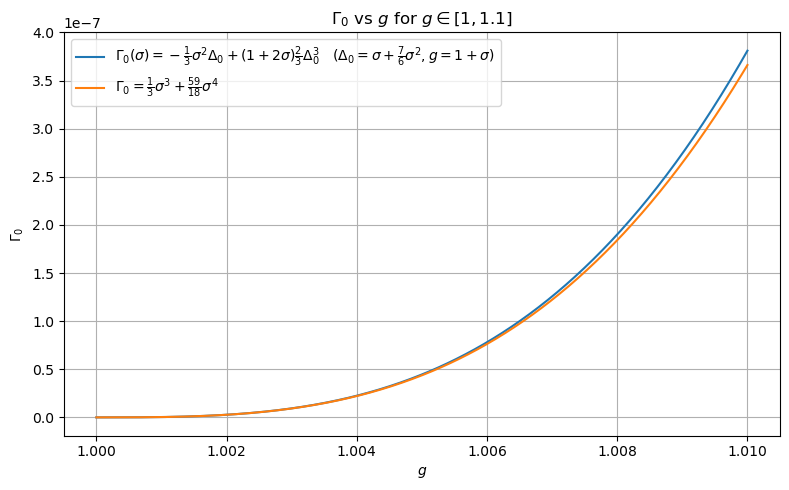

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

g_vals = np.linspace(1.0, 1.01, 500)
sigma_vals = g_vals - 1
Delta_0 = sigma_vals +7/6*sigma_vals**2
Gamma_0 = -sigma_vals**2 *Delta_0/3 +(1+2*sigma_vals)*2/3*g_vals**2 * Delta_0**3
Gamma_1 = 1/3*sigma_vals**3+59/18*sigma_vals**4
plt.figure(figsize=(8, 5))
plt.plot(g_vals, Gamma_0, label=r'$\Gamma_0(\sigma)=-\frac{1}{3}\sigma^2 \Delta_0 +(1+2\sigma)\frac{2}{3} \Delta_0^3 \quad (\Delta_0 = \sigma + \frac{7}{6}\sigma^2 ,g=1+\sigma$)')
plt.plot(g_vals, Gamma_1, label=r'$\Gamma_0=\frac{1}{3} \sigma^3+\frac{59}{18}\sigma^4$')
plt.xlabel(r'$g$')
plt.ylabel(r'$\Gamma_0$')
plt.title(r'$\Gamma_0$ vs $g$ for $g \in [1, 1.1]$')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


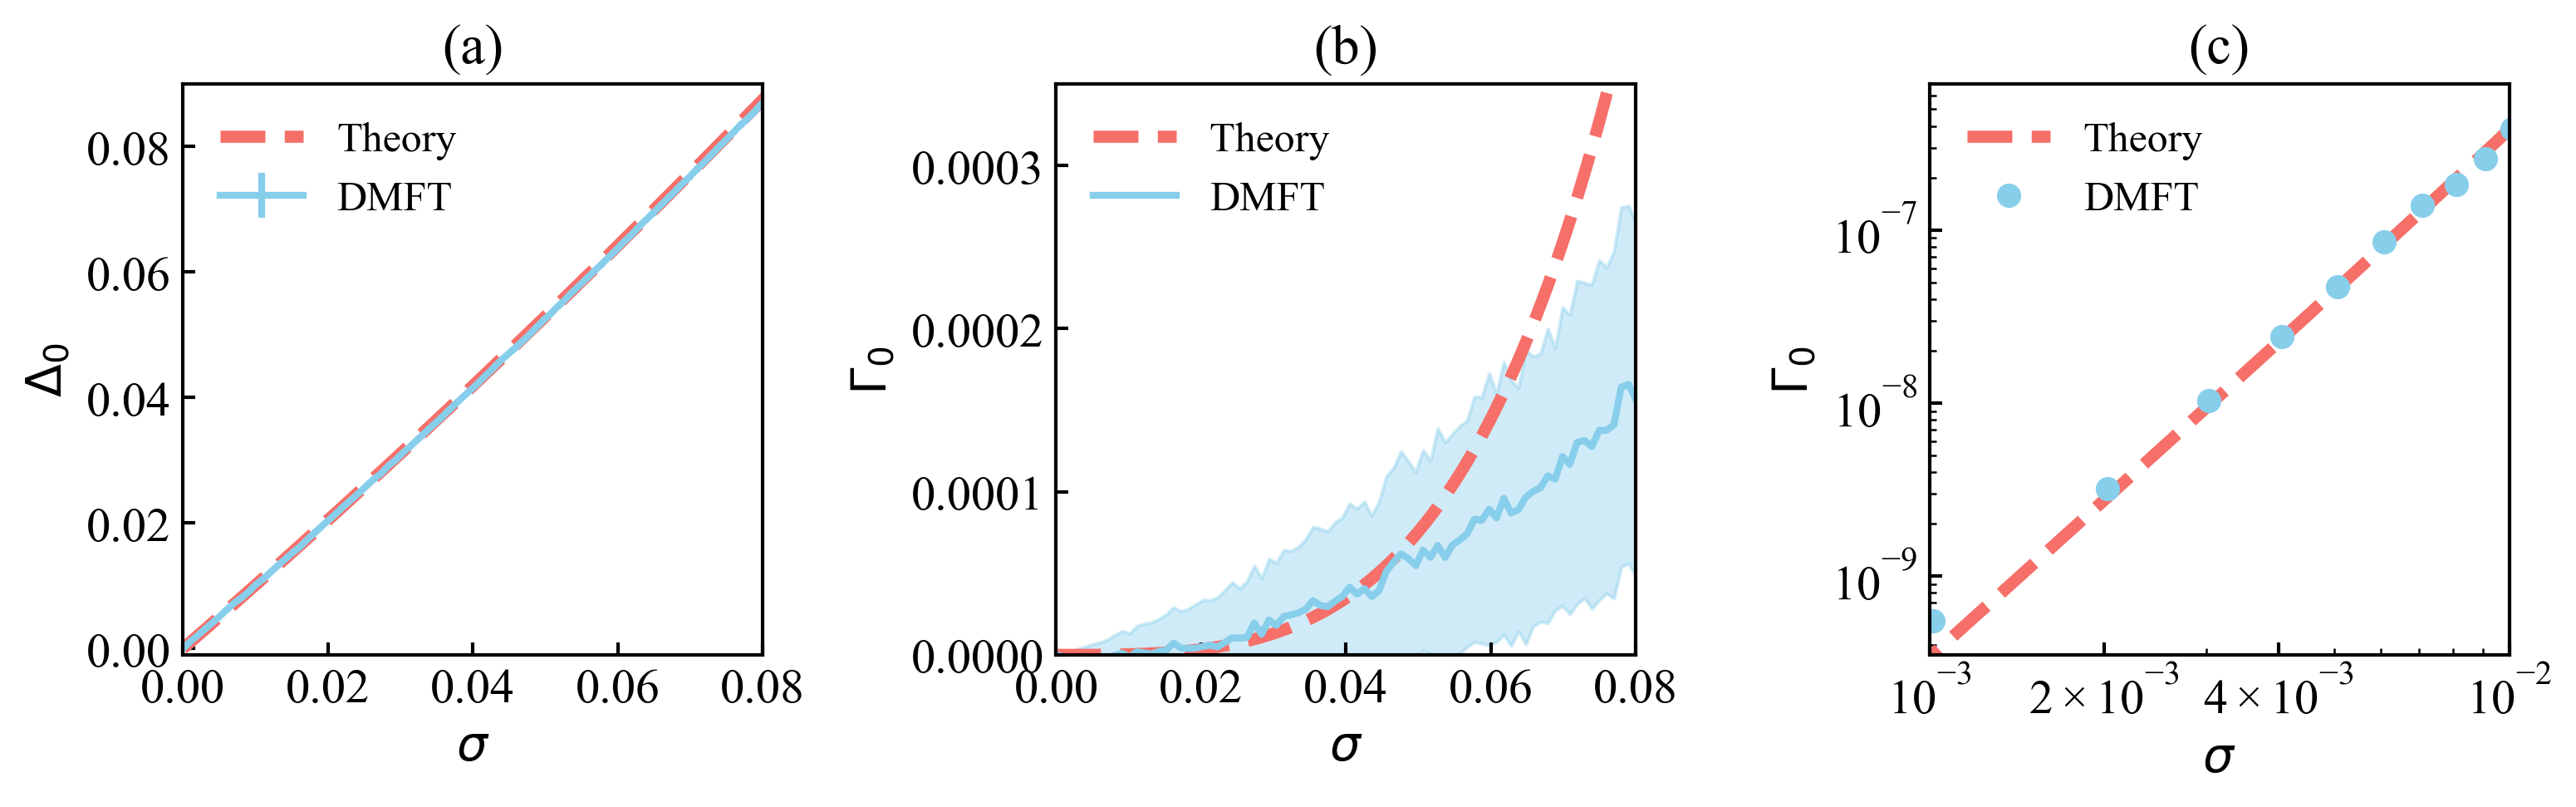

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import torch
import os
from matplotlib.ticker import LogFormatterSciNotation
from matplotlib.ticker import ScalarFormatter,LogLocator
import matplotlib.ticker as ticker
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

matplotlib.rcParams['font.family'] = 'Times New Roman'
matplotlib.rcParams['font.size'] = 12
matplotlib.rcParams['axes.linewidth'] = 1
matplotlib.rcParams['xtick.direction'] = 'in'
matplotlib.rcParams['ytick.direction'] = 'in'
matplotlib.rcParams['xtick.major.width'] = 1
matplotlib.rcParams['ytick.major.width'] = 1
matplotlib.rcParams['legend.frameon'] = False

try:
    folder = os.path.dirname(os.path.abspath(__file__))
except NameError:
    folder = os.getcwd()

g_list = torch.linspace(1.0, 1.1, 120)
filename = "DMFT_kinetic_vs_g1.00to1.08.csv"
df_dmft = pd.read_csv(os.path.join(folder, filename))

#Theory
g_vals = np.linspace(1.0, 1.1, 500)
sigma_vals = g_vals - 1
Delta_0 = sigma_vals + (7/6) * sigma_vals**2
Gamma_0 = -sigma_vals**2 * Delta_0 / 3 + (1 + 2 * sigma_vals )* (2/3) * g_vals**2 * Delta_0**3
Gamma_1= 1/3 * sigma_vals**3 + 59/18 * sigma_vals**4
#DMFT
Gamma_00 =  -(df_dmft['g']-1)**2 * df_dmft['Delta0'] / 3 + (2/3) * (1+2*(df_dmft['g']-1)) * df_dmft['Delta0']**3

fig, axs = plt.subplots(1, 3, figsize=(10.5, 3.4), dpi=300)

axs[0].errorbar(df_dmft['g'] - 1, df_dmft['Delta0'], 
                yerr=df_dmft['Gamma0_std'], fmt='-', lw=2, label="DMFT", color='skyblue', capsize=1)
axs[0].plot(sigma_vals, Delta_0, '--', lw=3.5, label='Theory', color='#F66F69')
axs[0].set_xlabel(r"$\sigma$", fontsize=14)
axs[0].set_ylabel(r"$\Delta_0$", fontsize=14)
axs[0].set_xlim(0.0, 0.08)
xticks_vals = [0.0, 0.02, 0.04,0.06, 0.08]
axs[0].set_xticks(xticks_vals)
yticks_vals = [0.0, 0.02, 0.04, 0.06, 0.08]
axs[0].set_yticks(yticks_vals)
axs[0].set_ylim(-0.001, 0.09)
axs[0].legend(fontsize=11)
axs[0].set_title("(a)", loc='center', fontsize=16)
axs[0].legend(fontsize=12, loc='upper left')
axs[0].tick_params(axis='both', labelsize=14)

axs[1].plot(g_vals-1, Gamma_0, '--', lw=3.5, color='#F66F69', label=r'Theory ')
axs[1].fill_between(df_dmft['g']-1, np.maximum(df_dmft['Gamma0'] - df_dmft['Gamma0_std'], -0.000003),
                    df_dmft['Gamma0'] + df_dmft['Gamma0_std'], color='skyblue', alpha=0.4)
axs[1].plot(df_dmft['g']-1, df_dmft['Gamma0'], '-', lw=2, label=r'DMFT', color='skyblue')
axs[1].set_xlabel(r"$\sigma$", fontsize=14)
axs[1].set_ylabel(r"$\Gamma_0$", fontsize=14)
axs[1].set_xlim(0.0, 0.08)
axs[1].set_ylim(0.0, 0.00035)
x1ticks_vals =  [0.0, 0.02, 0.04,0.06, 0.08]
axs[1].set_xticks(x1ticks_vals)
axs[1].legend(fontsize=11)
axs[1].set_title("(b)", loc='center', fontsize=16)
axs[1].legend(fontsize=12, loc='upper left')
axs[1].tick_params(axis='both', labelsize=14)

axs[2].plot(g_vals-1, Gamma_0, '--', lw=3.5, color='#F66F69', label=r'Theory')
axs[2].plot(df_dmft['g']-1, Gamma_00, 'o', lw=2, label=r'DMFT', color='skyblue')
axs[2].set_xlabel(r"$\sigma$", fontsize=14)
axs[2].set_ylabel(r"$\Gamma_0$", fontsize=14)
axs[2].set_xscale('log')
axs[2].set_yscale('log')
axs[2].set_ylim(0.35*1e-9, 0.7*1e-6)
axs[2].set_xlim(0.001, 0.01)
axs[2].xaxis.set_major_locator(ticker.LogLocator(base=10.0, subs=[1.0, 2.0, 4.0], numticks=10))
axs[2].xaxis.set_minor_locator(ticker.LogLocator(base=10.0, subs=np.arange(1.0, 10.0)*0.1, numticks=100))
axs[2].xaxis.set_minor_formatter(ticker.NullFormatter())  
axs[2].legend(fontsize=12, loc='upper left')
axs[2].set_title("(c)", loc='center', fontsize=16)
axs[2].tick_params(axis='both', labelsize=14)

plt.tight_layout()
plt.savefig("g1_loglog.pdf", bbox_inches='tight')
plt.show()